In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import tree
import scipy.cluster.hierarchy as sch
from scipy.optimize import curve_fit
from math import pi

In [2]:
# Load the dataset
df = pd.read_csv('vgsales.csv')

In [3]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


## K-means Clustering Visualization

In [3]:
# Select relevant columns
X = df[['NA_Sales', 'EU_Sales']].values

In [4]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


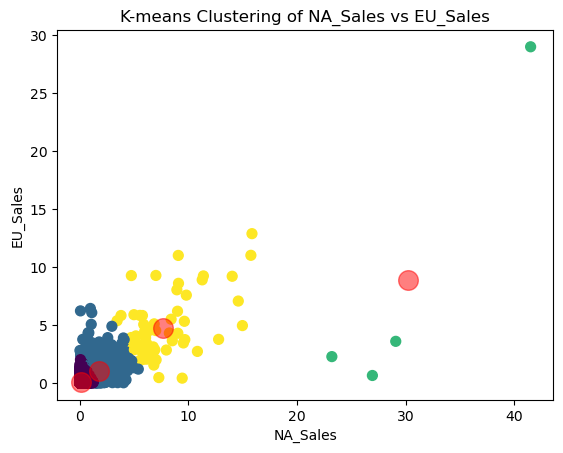

In [5]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
plt.title('K-means Clustering of NA_Sales vs EU_Sales')
plt.xlabel('NA_Sales')
plt.ylabel('EU_Sales')
plt.show()

## NA_Sales vs. EU_Sales with Regression Line

In [6]:
# Filter out rows where 'NA_Sales' or 'EU_Sales' is missing
df = df.dropna(subset=['NA_Sales', 'EU_Sales'])

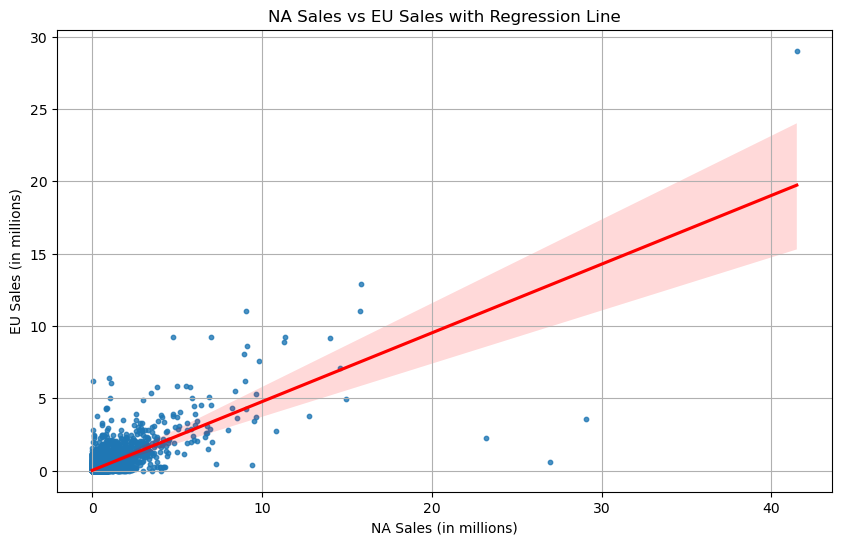

In [7]:
# Plot the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='NA_Sales', y='EU_Sales', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('NA Sales vs EU Sales with Regression Line')
plt.xlabel('NA Sales (in millions)')
plt.ylabel('EU Sales (in millions)')
plt.grid(True)
plt.show()

## Radar Chart of Mean Sales by Region

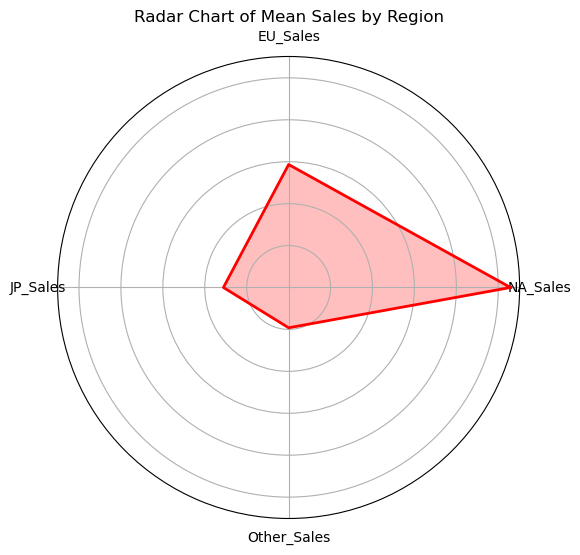

In [4]:
# Calculate mean sales by region
mean_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean().values

# Categories for radar chart
categories = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
mean_sales = np.concatenate((mean_sales, [mean_sales[0]]))
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, mean_sales, color='red', alpha=0.25)
ax.plot(angles, mean_sales, color='red', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Radar Chart of Mean Sales by Region')
plt.show()

## Stacked Bar Chart of Sales by Year and Region

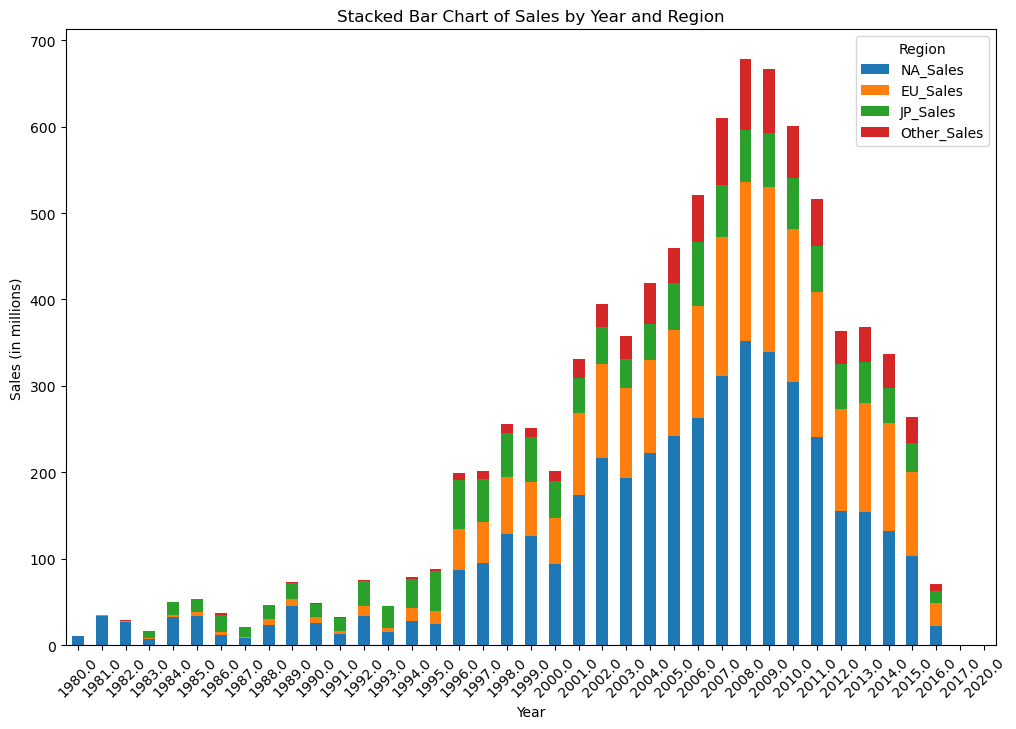

In [5]:
# Sum sales by year for each region
year_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plot stacked bar chart
year_sales.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart of Sales by Year and Region')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

## Strip Plot of Sales by Platform and Genre

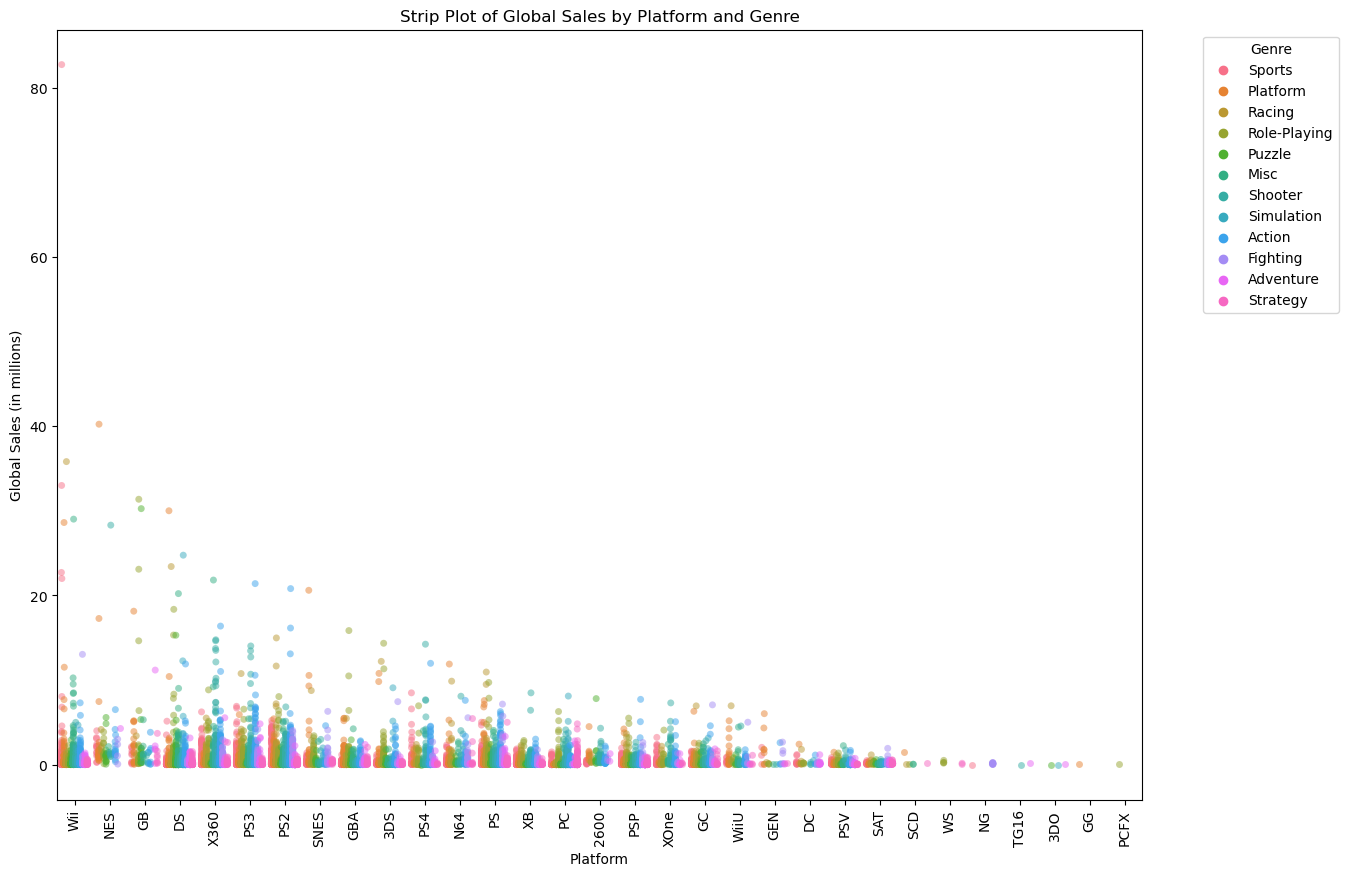

In [7]:
# Strip plot of global sales by platform and genre
plt.figure(figsize=(14, 10))
sns.stripplot(x='Platform', y='Global_Sales', hue='Genre', data=df, jitter=True, dodge=True, alpha=0.5)
plt.title('Strip Plot of Global Sales by Platform and Genre')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=90)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Joint Plot of NA Sales vs. Global Sales

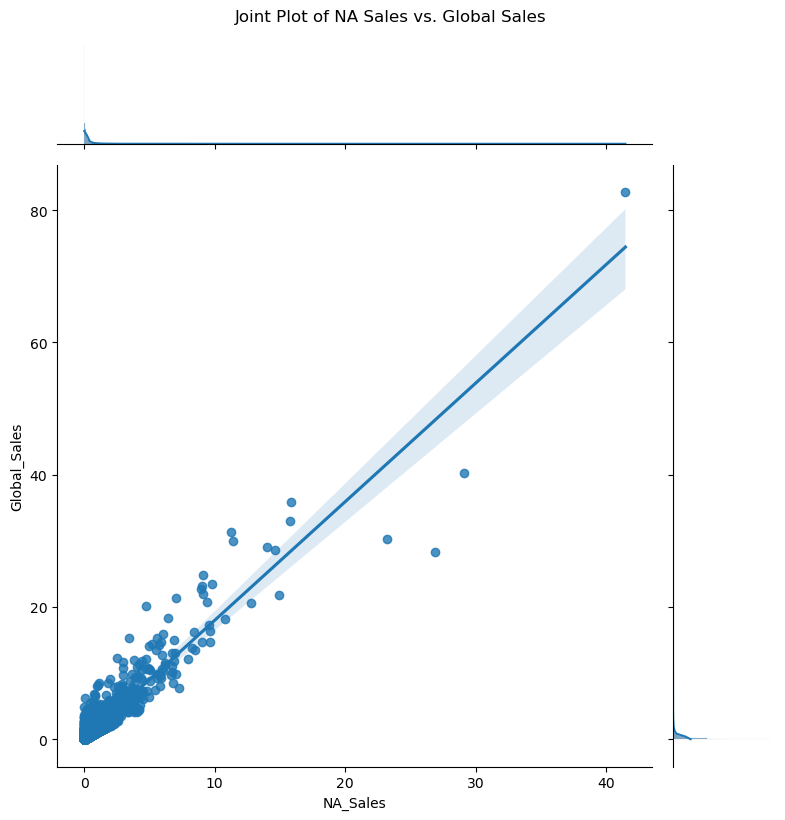

In [12]:
# Joint plot of NA Sales vs. Global Sales
sns.jointplot(x='NA_Sales', y='Global_Sales', data=df, kind='reg', height=8)
plt.suptitle('Joint Plot of NA Sales vs. Global Sales', y=1.02)
plt.show()

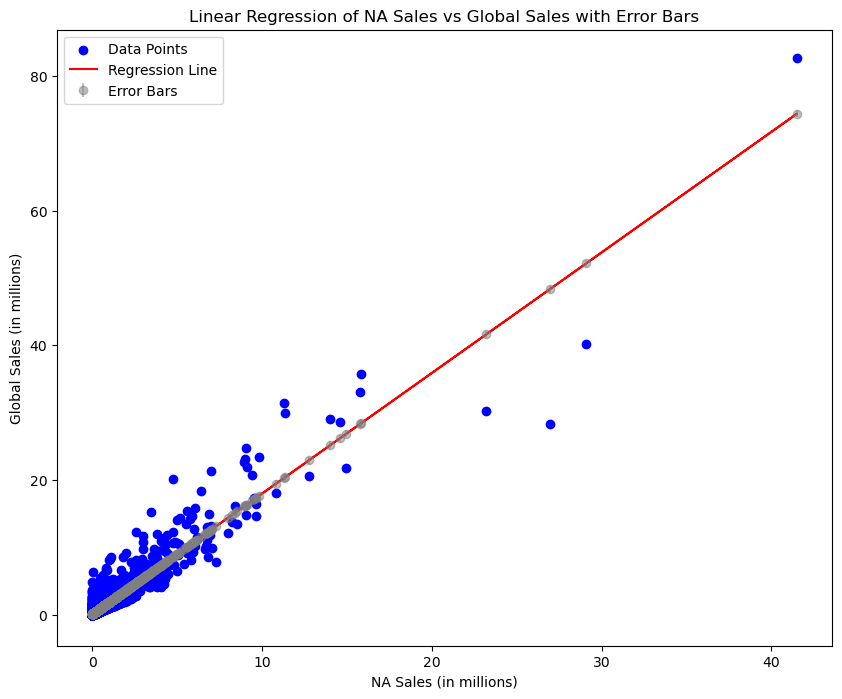

In [18]:
# Filter out rows with missing sales data
df = df.dropna(subset=['NA_Sales', 'Global_Sales'])

# Select features for regression
X = df['NA_Sales'].values.reshape(-1, 1)
y = df['Global_Sales'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Calculate error (standard deviation of the residuals)
residuals = y - y_pred
std_error = np.std(residuals)

# Plot the regression line with error bars
plt.figure(figsize=(10, 8))
plt.scatter(df['NA_Sales'], df['Global_Sales'], color='blue', label='Data Points')
plt.plot(df['NA_Sales'], y_pred, color='red', label='Regression Line')

# Error bars
plt.errorbar(df['NA_Sales'], y_pred, yerr=std_error, fmt='o', color='gray', alpha=0.5, label='Error Bars')

plt.title('Linear Regression of NA Sales vs Global Sales with Error Bars')
plt.xlabel('NA Sales (in millions)')
plt.ylabel('Global Sales (in millions)')
plt.legend()
plt.show()

## Cumulative Sales Over Time

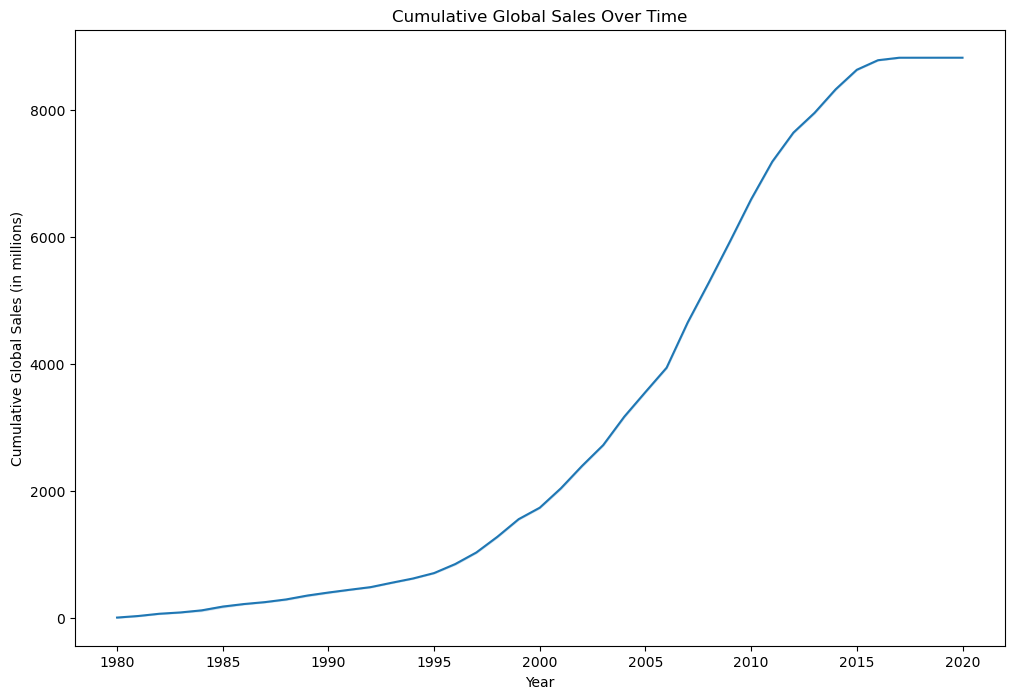

In [14]:
# Calculate cumulative sales over time
df = df.sort_values('Year')
df['Cumulative_Sales'] = df['Global_Sales'].cumsum()

# Plot cumulative sales over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Cumulative_Sales', data=df)
plt.title('Cumulative Global Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Global Sales (in millions)')
plt.show()

## 3D Scatter Plot with Cluster Membership

In [14]:
# Select relevant columns
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales']].values

In [15]:
# Fit k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [16]:
# Get cluster labels
labels = kmeans.labels_

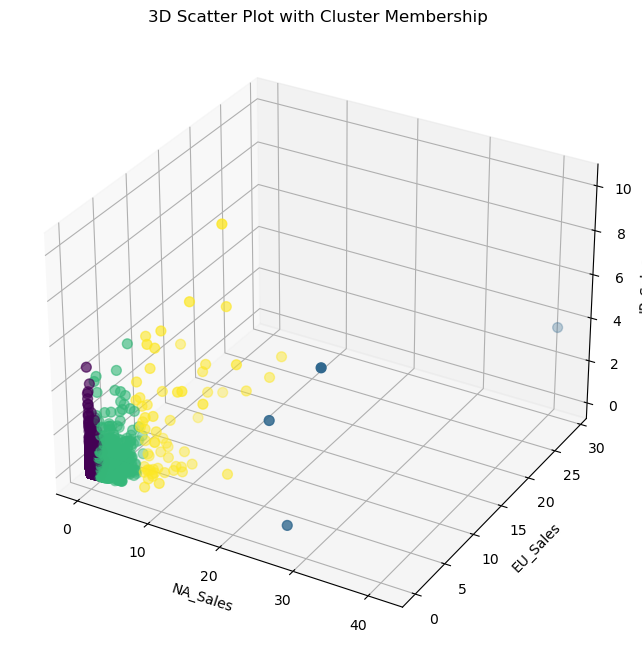

In [17]:
# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=50)
ax.set_xlabel('NA_Sales')
ax.set_ylabel('EU_Sales')
ax.set_zlabel('JP_Sales')
ax.set_title('3D Scatter Plot with Cluster Membership')
plt.show()

## Gaussian Mixture Models (GMM) Visualization

In [18]:
# Fit GMM
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

GaussianMixture(n_components=4)

In [19]:
# Predict the labels
y_gmm = gmm.predict(X)

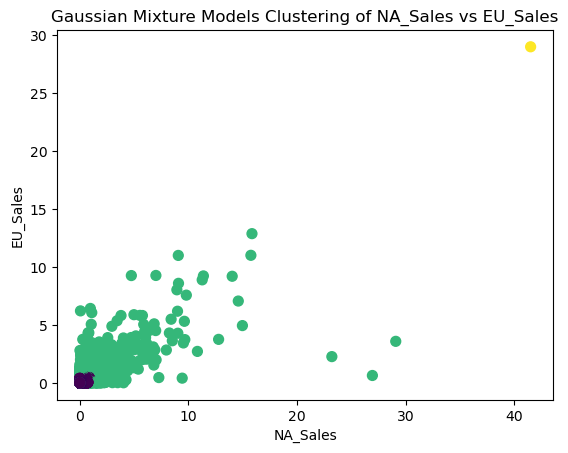

In [20]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Gaussian Mixture Models Clustering of NA_Sales vs EU_Sales')
plt.xlabel('NA_Sales')
plt.ylabel('EU_Sales')
plt.show()

## Pie Chart of Game Genres

In [21]:
# Count the occurrences of each genre
genre_counts = df['Genre'].value_counts()

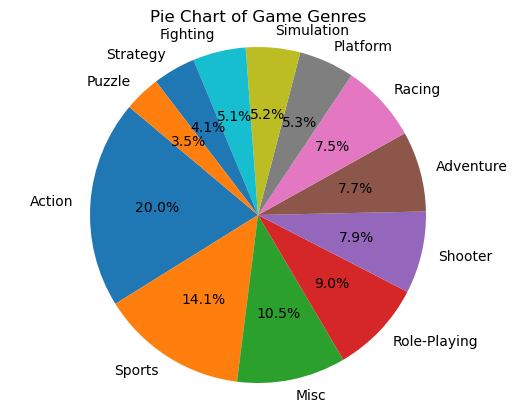

In [22]:
# Plot pie chart
plt.pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Game Genres')
plt.show()

## Line graph of global sales of video games over the years

In [23]:
# Filter out rows where 'Year' is missing or invalid
df = df.dropna(subset=['Year'])
df = df[df['Year'] != 'N/A']

In [24]:
# Convert 'Year' to integer
df['Year'] = df['Year'].astype(int)

In [25]:
# Group by 'Year' and sum 'Global_Sales'
yearly_sales = df.groupby('Year')['Global_Sales'].sum().reset_index()

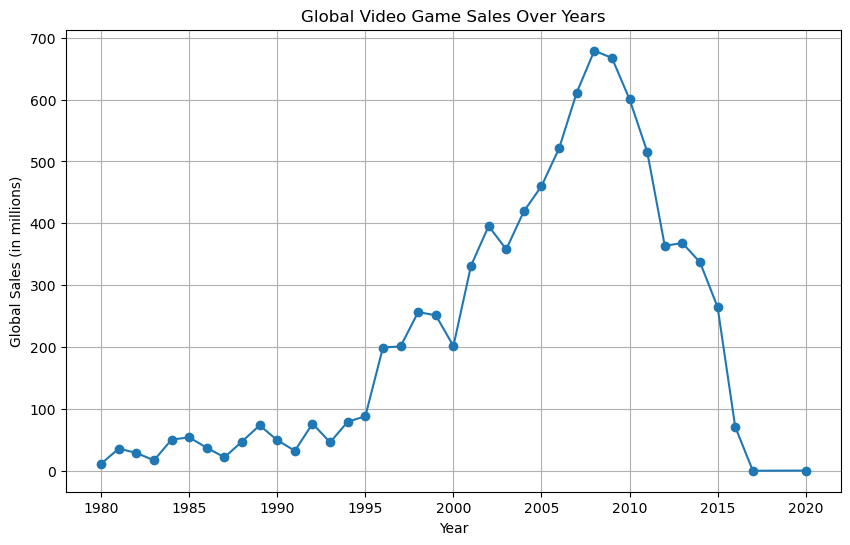

In [26]:
# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Year'], yearly_sales['Global_Sales'], marker='o', linestyle='-')
plt.title('Global Video Game Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.show()

## Correlation Heatmap

In [27]:
# Compute the correlation matrix
corr_matrix = df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_5616\2917329483.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


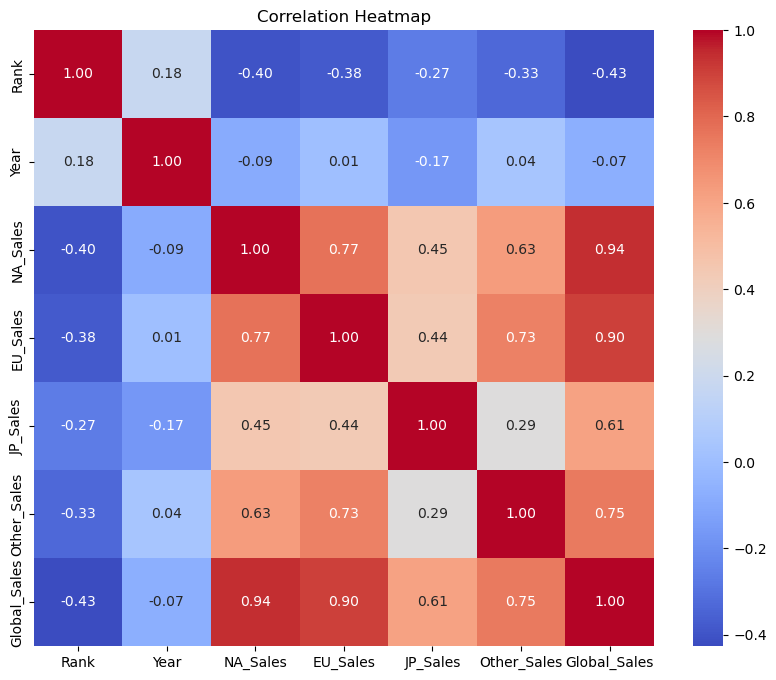

In [28]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Pairplot of Numerical Features

In [29]:
# Select numerical features for corner plot
numerical_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

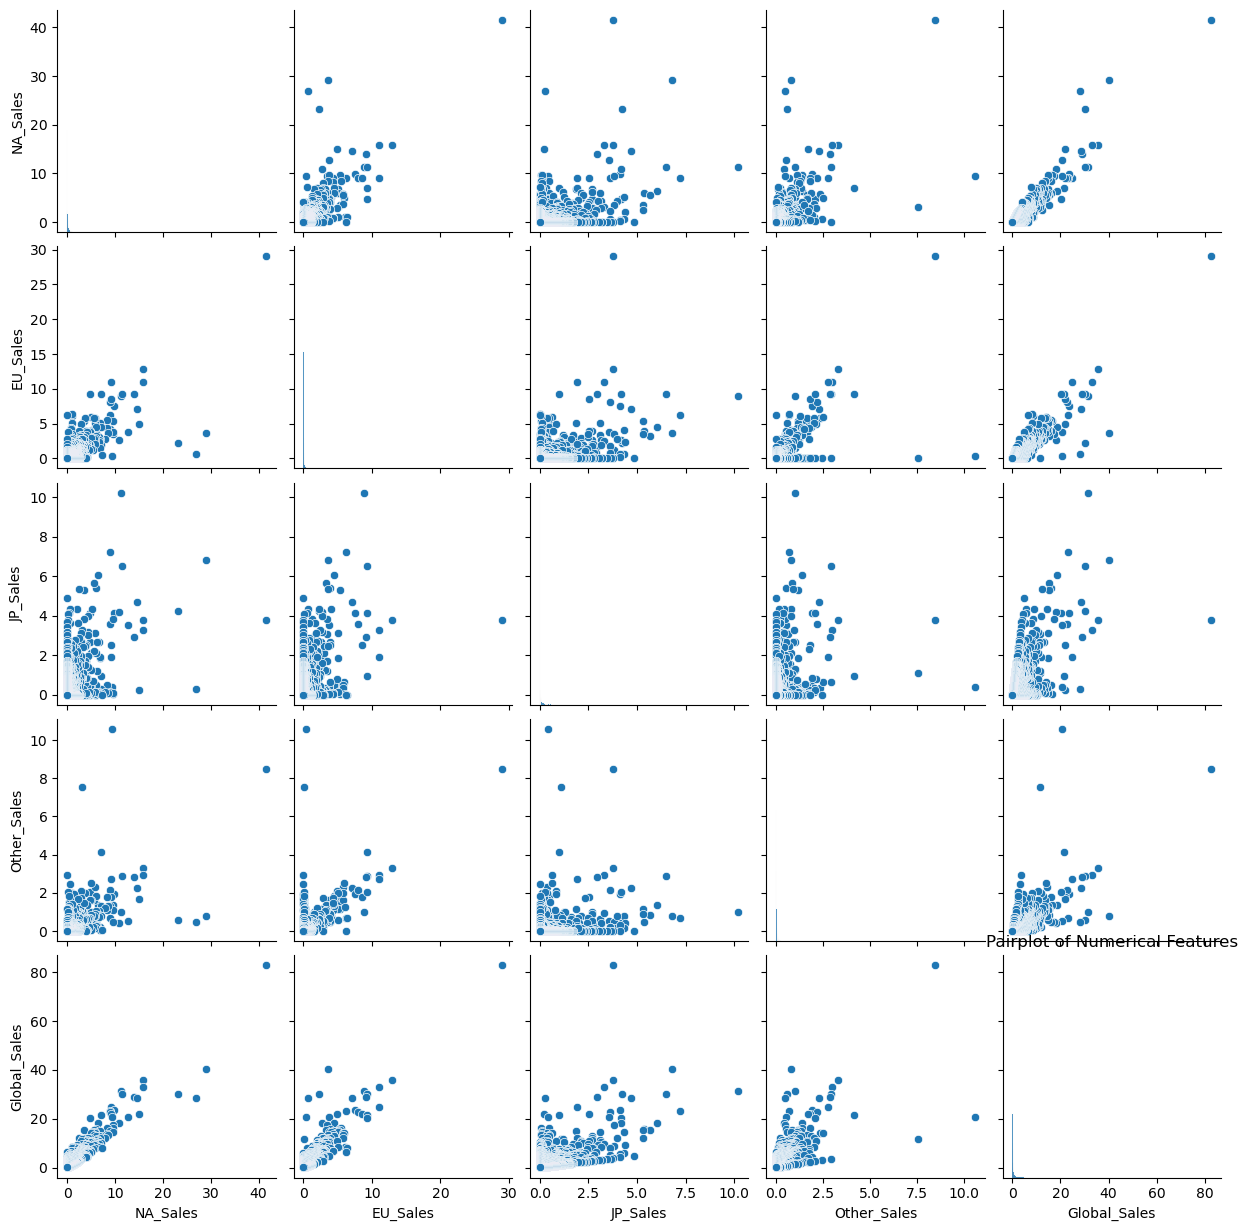

In [30]:
# Plot corner plot
sns.pairplot(df[numerical_features])
plt.title('Pairplot of Numerical Features')
plt.show()

## Box Plot of Sales Across Regions

In [31]:
# Select relevant columns for box plot
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

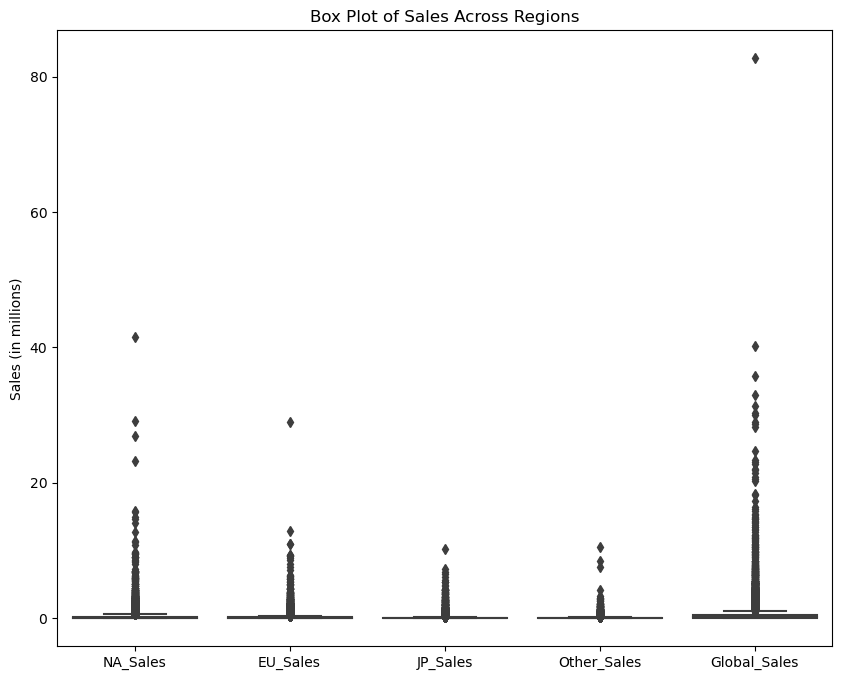

In [32]:
# Plot box plot
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[sales_columns])
plt.title('Box Plot of Sales Across Regions')
plt.ylabel('Sales (in millions)')
plt.show()

## Elbow and Silhouette Plots

In [33]:
# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

In [34]:
# Initialize lists to store elbow and silhouette scores
elbow_scores = []
silhouette_scores = []

In [35]:
# Define range of clusters to try
k_values = range(2, 11)

In [36]:
# Iterate over each value of k
for k in k_values:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    
    # Append the inertia to the list of scores
    elbow_scores.append(kmeans.inertia_)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

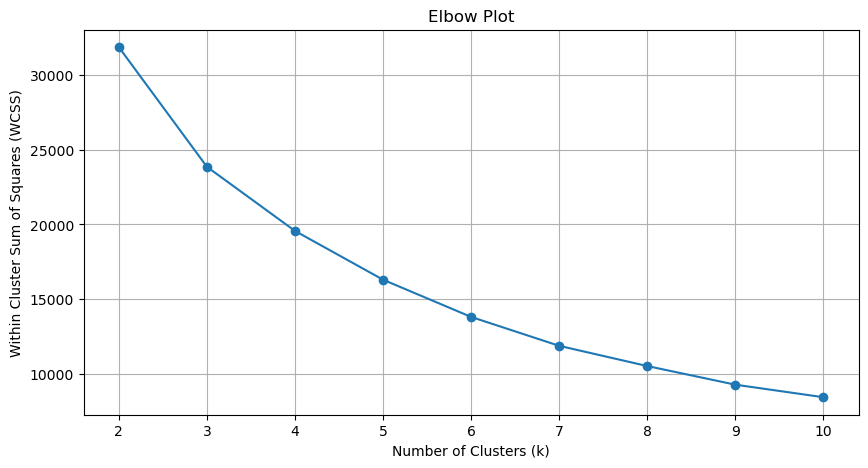

In [37]:
# Plot the elbow plot
plt.figure(figsize=(10, 5))
plt.plot(k_values, elbow_scores, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

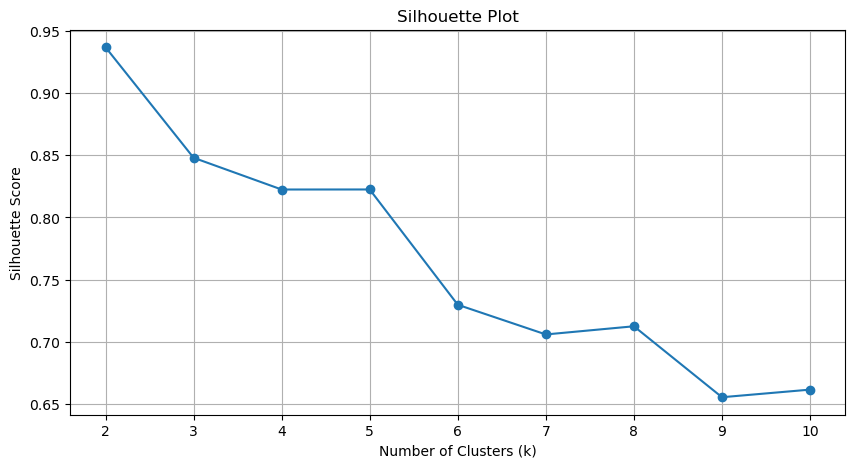

In [38]:
# Plot the silhouette plot
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()